# Homework 9

## 1. Closed Laptop Questions. 10 POINTS
Provide the binary values for each bit in the following numpy dtypes:  
    a. `np.int8(7)`   
    b. `np.int16(7)`   
    c. `np.uint8(4)`    

In [ ]:
a, 00000111
b, 00000000 00000111
c, 00000100

## 2. Closed Laptop Questions. 10 POINTS
Provide the strides for each of the folling numpy arrays:  
a. `np.array([[0, 1, 2], [3, 4, 5]], dtype='int32')`  
b. `np.array([[0, 1, 2], [3, 4, 5]], dtype='uint64')`  
c. `np.array([0, 1, 2, 3, 4, 5], dtype='uint32')`  

In [ ]:
a, (12, 4)
b, (24, 8)
c, (4,)

## 3. Consider the following Image. 
![img](whereswaldo.jpg)

### 10 POINTS. 
Consider that you can read this image into python and create a numpy array as follows:

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


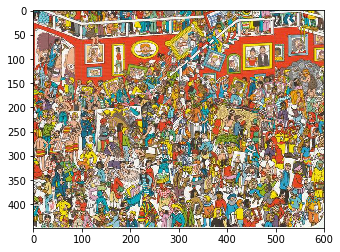

In [1]:
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
waldo = imread('whereswaldo.jpg')
plt.imshow(waldo)

In [2]:
waldo.shape

(449, 600, 3)

### Use array slicing/indexing to obtain...
Look on the red wall. There is an oval frame on the wall containing a man with a red wiggly mustache. Obtain a smaller image of the peron in the frame with the red mustache. Try to get the crop as tight as possible. Save this crop as an object named `red_mustache`.

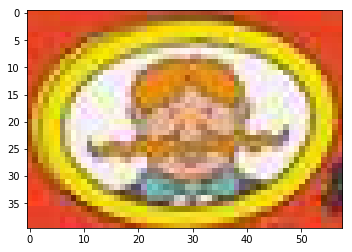

In [3]:
red_mustache = waldo[60:100, 202:260]
plt.imshow(red_mustache)

### 10 POINTS.
What is the dimensions of this crop?  
What are the strides of this crop?

In [4]:
a = red_mustache.shape
b = red_mustache.strides
print('The dimension of this crop is ' + str(len(a)))
print('The strides of this crop is ' + str(b))

The dimension of this crop is 3
The strides of this crop is (1800, 3, 1)


### 10 POINTS.
On the same wall is a frame with a man and woman in a picture. Using the same dimensions as above, crop the original photo so that you get a crop of the man and woman in the picture on the wall. Save this crop as `man_woman`. It's okay if this picture isn't cropped as well, but it should have both people in the crop **and have the same dimensions** as the `red_mustache` crop.

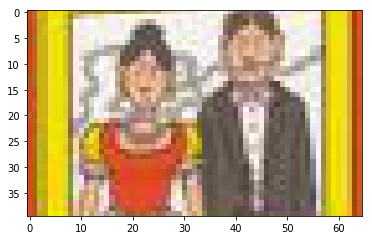

In [5]:
man_woman = waldo[75:115, 430:495]
plt.imshow(man_woman)

### 10 POINTS.
Combine these two images to make one numpy array. Do this in a way that makes it easy for someone who uses the numpy array to quickly understand that it is two distinct arrays.

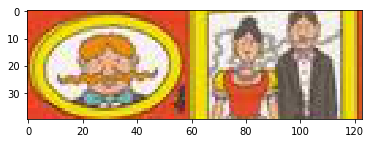

In [8]:
import numpy as np
two_images = np.hstack((red_mustache, man_woman))
plt.imshow(two_images)

## Ordinary Least Squares. 40 Points.
Create a class called `OLS`. 
1. When creating an object from this new type, `OLS` should expect two numpy arrays: `x` and `y`. 
2. For this class, create a method called `beta_coef`. This function should take an optional parameter called `intercept`. If true this function will first add the intercept data to `x`, otherwise, if false, it will assume that information is already present. This function should then return the $\hat{\beta}$ coefficient vector of the least-squares estimate from a linear model.
3. Create a third method called ssr (model sum of squares). This method will calculate the `ssr` as follows:  
$(\hat{y}-\bar{y}_n)^{T}(\hat{y}-\bar{y_{n}})$  

This notation $y_{n}$ denotes a vector of means size $n$. $\hat{y}$ denotes a predicted value.

In [9]:
from numpy.linalg import inv
class OLS:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def beta_coef(self, *intercept):
        if intercept:
            self.x[:,1:] += intercept[0]
        a = inv(np.dot(self.x.T, self.x))
        b = np.dot(a, self.x.T)
        beta = np.dot(b, self.y)
        return beta
    
    def ssr(self):
        beta_hat = self.beta_coef()
        y_hat = np.dot(self.x, beta_hat)
        y_bar = np.mean(self.y)
        a = y_hat - y_bar
        b = a.T
        ssr = np.dot(b,a)
        return ssr

#test
x = np.array([[1,0,1],[1,11,5],[1,11,4],[1,7,3],[1,4,1],[1,10,4],[1,5,4],[1,8,2]])
y = np.array([11,15,13,14,0,19,16,8])
ols = OLS(x,y)
beta = ols.beta_coef()
print('beta hat is ' + str(beta))
ssr = ols.ssr()
print('ssr is ' + str(ssr))

beta1 = ols.beta_coef(3)
print('beta hat with intercept = 3 is ' + str(beta1))

beta hat is [ 3.7 -0.7  4.4]
ssr is 163.59999999999997
beta hat with intercept = 3 is [-7.4 -0.7  4.4]
